In [1]:
import math
import machine_learning_datasets as mldatasets
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding and Preparing the Data

In [2]:
# CVDs are a group of disorders, the most common of which is coronary heart disease (also known as 
# Ischaemic Heart Disease). According to the World Health Organization, CVD is the leading cause of death 
# globally, killing close to 18 million people annually. Coronary heart disease and strokes (which are, for 
# the most part, a byproduct of CVD) are the most significant contributors to that. It is estimated that 
# 80% of CVD is made up of modifiable risk factors. In other words, some of the preventable factors 
# that cause CVD include the following:

# • Poor diet
# • Smoking and alcohol consumption habits
# • Obesity
# • Lack of physical activity
# • Poor sleep

# Also, many of the risk factors are non-modifiable and, therefore, known to be unavoidable, including 
# the following:

# • Genetic predisposition
# • Old age
# • Male (varies with age)

cvd_df = mldatasets.load("cardiovascular-disease")

https://raw.githubusercontent.com/caravanuden/cardio/master/cardio_train.csv downloaded to D:\Tutorials\2025\XAI\02_Key_Concepts_of_Interpretability\data\cardio_train.csv
1 dataset files found in D:\Tutorials\2025\XAI\02_Key_Concepts_of_Interpretability\data folder
parsing D:\Tutorials\2025\XAI\02_Key_Concepts_of_Interpretability\data\cardio_train.csv


In [3]:
cvd_df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [4]:
# Display dataset structure and information
# This shows 70,000 entries with 12 columns including age, gender, height, weight,
# blood pressure (ap_hi, ap_lo), cholesterol, glucose, smoking, alcohol, activity,
# and the target variable 'cardio' (cardiovascular disease presence)

cvd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [5]:
# To understand what was loaded, the following is the data dictionary, as described in the source:

#  • age: Of the patient in days (objective feature)
#  • height: In centimeters (objective feature)
#  • weight: In kg (objective feature)
#  • gender: A binary where 1: female, 2: male (objective feature)
#  • ap_hi: Systolic blood pressure, which is the arterial pressure exerted when blood is ejected 
# during ventricular contraction. Normal value: < 120 mmHg (objective feature)
#  • ap_lo: Diastolic blood pressure, which is the arterial pressure in between heartbeats. Normal 
# value: < 80 mmHg (objective feature)
#  • cholesterol: An ordinal where 1: normal, 2: above normal, and 3: well above normal (objective feature)
#  • gluc: An ordinal where 1: normal, 2: above normal, and 3: well above normal (objective feature)
#  • smoke: A binary where 0: non-smoker and 1: smoker (subjective feature)
#  • alco: A binary where 0: non-drinker and 1: drinker (subjective feature)
#  • active: A binary where 0: non-active and 1: active (subjective feature)
#  • cardio: A binary where 0: no CVD and 1: has CVD (objective and target feature)



# • Objective: A feature that is a product of official documents or a clinical examination. It is ex
# pected to have a rather insignificant margin of error due to clerical or machine errors.

# • Subjective: Reported by the patient and not verified (or unverifiable). In this case, due to lapses 
# of memory, differences in understanding, or dishonesty, it is expected to be less reliable than 
# objective features.

## Data Preparation

In [6]:
# Convert age from days to years for better interpretability
# Original dataset stores age in days, dividing by 365.24 converts to years
cvd_df['age'] =  cvd_df['age'] / 365.24

In [7]:
# Define a helper function to set table header font size for display
def set_header_font():
    return [dict(selector="th", props=[("font-size", "14pt")])]

In [8]:
# Display descriptive statistics for all features
# Shows count, mean, std, min, and percentiles (1% and 99%)
# This helps identify outliers and understand data distribution
cvd_df.describe(percentiles=[.01,.99]).transpose().style.format('{:.2f}').\
    set_properties(**{'font-size': '16pt'}).set_table_styles(set_header_font())

,count,mean,std,min,1%,50%,99%,max
age,70000.00,53.30,6.76,29.56,39.61,53.95,64.31,64.92
gender,70000.00,1.35,0.48,1.00,1.00,1.00,2.00,2.00
height,70000.00,164.36,8.21,55.00,147.00,165.00,184.00,250.00
weight,70000.00,74.21,14.40,10.00,48.00,72.00,117.00,200.00
ap_hi,70000.00,128.82,154.01,-150.00,90.00,120.00,180.00,16020.00
ap_lo,70000.00,96.63,188.47,-70.00,60.00,80.00,1000.00,11000.00
cholesterol,70000.00,1.37,0.68,1.00,1.00,1.00,3.00,3.00
gluc,70000.00,1.23,0.57,1.00,1.00,1.00,3.00,3.00
smoke,70000.00,0.09,0.28,0.00,0.00,0.00,1.00,1.00
alco,70000.00,0.05,0.23,0.00,0.00,0.00,1.00,1.00


In [9]:
# age appears valid because it ranges between 29 and 65 years, which is not out of the 
# ordinary, but there are some anomalous outliers for ap_hi and ap_lo. Blood pressure can’t be nega
# tive, and the highest ever recorded was 370. Keeping these outliers in there can lead to poor model 
# performance and interpretability. Given that the 1% and 99% percentiles still show values in normal 
# ranges according to Figure 2.1, there’s close to 2% of records with invalid values. If you dig deeper, 
# you’ll realize it’s closer to 1.8%.

# Identify records with incorrect blood pressure values
# Systolic (ap_hi) and diastolic (ap_lo) blood pressure should be:
# - Between 40 and 370 mmHg (extreme but biologically possible range)
# These thresholds help remove data entry errors
incorrect_l = cvd_df[(cvd_df['ap_hi'] > 370) | (cvd_df['ap_hi'] <= 40) |\
                     (cvd_df['ap_lo'] > 370) | (cvd_df['ap_lo'] <= 40)].index

# Calculate percentage of incorrect records (approximately 1.77%)
print(len(incorrect_l) / cvd_df.shape[0])

0.017728571428571427


In [10]:
# Remove records with incorrect blood pressure values
cvd_df.drop(incorrect_l, inplace=True)

In [11]:
# Remove records where systolic pressure is less than diastolic pressure
# This is physiologically impossible and indicates data errors
cvd_df = cvd_df[cvd_df['ap_hi'] >= cvd_df['ap_lo']].reset_index(drop=True)

In [12]:
# Separate features (X) and target variable (y)
y = cvd_df['cardio']  # Target: 1 = cardiovascular disease, 0 = no disease
X = cvd_df.drop(['cardio'], axis=1).copy()  # All other columns as features

# Split data into training (85%) and testing (15%) sets
# random_state=42 ensures reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=9)

# Learning about Interpretation Method Types and Scopes

In [13]:
# Build a Logistic Regression model using statsmodels
# sm.add_constant() adds an intercept term to the model
# Logistic regression is highly interpretable and allows us to understand
# the relationship between features and the target variable
log_model = sm.Logit(y_train, sm.add_constant(X_train))
log_result = log_model.fit()

# Display comprehensive model statistics
# Key metrics to note:
# - Pseudo R-squared: 0.189 (18.9% variance explained)
# - Coef.: coefficient for each feature (log-odds scale)
# - P>|z|: p-values (all features except gender are significant)
print(log_result.summary2())

Optimization terminated successfully.
         Current function value: 0.562145
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: cardio           Pseudo R-squared: 0.189     
Date:               2025-10-14 02:35 AIC:              65636.3972
No. Observations:   58359            BIC:              65744.0896
Df Model:           11               Log-Likelihood:   -32806.   
Df Residuals:       58347            LL-Null:          -40448.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
               Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
-----------------------------------------------------------------
const         -11.1677   0.2507 -44.5530 0.0000 -11.6590 -10.6764
age             0.0504   0.0015  34.3350 0.0000   0.0475   0.0532


In [14]:
# The coefficients are the log odds, which are the logarithms of the odds. Also, odds 
# are the probability of a positive case over the probability of a negative case, where the positive case is 
# the label we are trying to predict. It doesn’t necessarily indicate what is favored by anyone. For instance, 
# if we are trying to predict the odds of a rival team winning the championship today, the positive case 
# would be that they own, regardless of whether we favor them or not. Odds are often expressed as a 
# ratio. The news could say the probability of them winning today is 60% or say the odds are 3:2 or 3/2 
# = 1.5. In log odds form, this would be 0.176, which is the logarithm of 1.5. They are basically the same 
# thing but expressed differently. An exponential function is the inverse of a logarithm, so it can take 
# any log odds and return the odds, as we have done.

In [15]:
# Calculate odds ratios by exponentiating coefficients
# Odds ratio interpretation:
# - >1: increase in feature increases disease probability
# - <1: increase in feature decreases disease probability
# - =1: no effect
# Example: cholesterol OR=1.645 means each unit increase multiplies odds by 1.645
np.exp(log_result.params).sort_values(ascending=False)

cholesterol    1.645409
ap_hi          1.057123
age            1.051662
ap_lo          1.011482
weight         1.010800
height         0.996614
gender         0.994480
gluc           0.887356
smoke          0.865710
alco           0.825331
active         0.782065
const          0.000014
dtype: float64

In [16]:
# Back to our CVD case. Now that we have the odds, we can interpret what it means. For example, what 
# do the odds mean in the case of cholesterol? It means that the odds of CVD increase by a factor of 
# 1.64 for each additional unit of cholesterol, provided every other feature stays unchanged. Being able 
# to explain the impact of a feature on the model in such tangible terms is one of the advantages of an 
# intrinsically interpretable model such as logistic regression.

In [17]:
# Although the odds provide us with useful information, they don’t tell us what matters the most and, 
# therefore, by themselves, cannot be used to measure feature importance.

# they all have different scales, so that makes a huge difference.
# This is because if we measure the odds of how much some
# thing increases, we have to know by how much it typically increases because that provides context. 
# For example, we could say that the odds of a specific species of butterfly living one day more are 0.66 
# after their first eggs hatch. This statement is meaningless unless we know the lifespan and reproduc
# tive cycle of this species.

In [18]:
# Calculate standard deviation of each feature
# This shows the typical variation in each feature
# Features with larger std may have more practical impact even with smaller coefficients
np.std(X_train, 0)

age             6.753314
gender          0.476652
height          8.186996
weight         14.331368
ap_hi          16.682047
ap_lo           9.434014
cholesterol     0.678979
gluc            0.570598
smoke           0.283529
alco            0.224476
active          0.396201
dtype: float64

In [19]:
# Another reason why odds cannot be used to measure feature importance is that despite favorable odds, 
# sometimes features are not statistically significant. They are entangled with other features in such 
# a way they might appear to be significant, but we can prove that they aren’t. This can be seen in the 
# summary table for the model, under the P>|z| column. This value is called the p-value, and when it’s 
# less than 0.05, we reject the null hypothesis that states that the coefficient is equal to zero. In other 
# words, the corresponding feature is statistically significant. However, when it’s above this number, 
# especially by a large margin, there’s no statistical evidence that it affects the predicted score. Such is 
# the case with gender, at least in this dataset.

In [20]:
# Calculate absolute impact by multiplying coefficient by standard deviation
# This accounts for both the effect size (coefficient) and typical variation (std)
# This gives a more realistic measure of feature importance
# Results show ap_hi (systolic BP) has the largest practical impact
coefs = log_result.params.drop(labels=['const','gender'])
stdv = np.std(X_train, 0).drop(labels='gender')
abs(coefs * stdv).sort_values(ascending=False)

ap_hi          0.926707
age            0.340174
cholesterol    0.338124
weight         0.153945
ap_lo          0.107705
active         0.097393
gluc           0.068192
alco           0.043093
smoke          0.040886
height         0.027770
dtype: float64

In [21]:
# The preceding table can be interpreted as an approximation of risk factors from high to low according 
# to the model. It is also a model-specific feature importance method, in other words, a global model 
# (modular) interpretation method.

## Interpreting Individual Predictions with Logistic Regression

In [22]:
# Generate predictions for the test set
# Returns probabilities between 0 and 1 for cardiovascular disease
y_pred = log_result.predict(sm.add_constant(X_test)).to_numpy()
print(y_pred)

[0.6182222  0.33604015 0.21126989 ... 0.30789012 0.26143349 0.31372653]


In [23]:
# Example: Analyze prediction for a specific individual (index 2872)
# Prediction: 0.379 (37.9% probability of cardiovascular disease)
print(y_pred[2872])

0.3792254083863875


In [24]:
# Display feature values for this individual
print(X_test.iloc[2872])

age             51.620852
gender           2.000000
height         165.000000
weight          64.000000
ap_hi          120.000000
ap_lo           80.000000
cholesterol      1.000000
gluc             1.000000
smoke            0.000000
alco             0.000000
active           0.000000
Name: 19040, dtype: float64


In [25]:
# Define baseline/reference feature values for comparison
# These represent a healthy reference individual
filler_feature_values = {
    "age": 30, "gender": 1, "height": 165, "weight": 57, 
    "ap_hi": 100, "ap_lo": 70, "cholesterol": 1, "gluc": 1, 
    "smoke": 0, "alco": 0, "active": 1
}

In [26]:
# Prepare the highlighted individual's data for visualization
# Includes the constant term (intercept) as first value
# reason for the constant is that in statsmodels, we must explicitly define the intercept. For this reason, 
# the logistic model has an additional 0 feature, which always equals 1.
X_highlight = np.reshape(\
    np.concatenate(([1], X_test.iloc[2872].to_numpy())), (1, 12))
print(X_highlight)

[[  1.          51.62085204   2.         165.          64.
  120.          80.           1.           1.           0.
    0.           0.        ]]


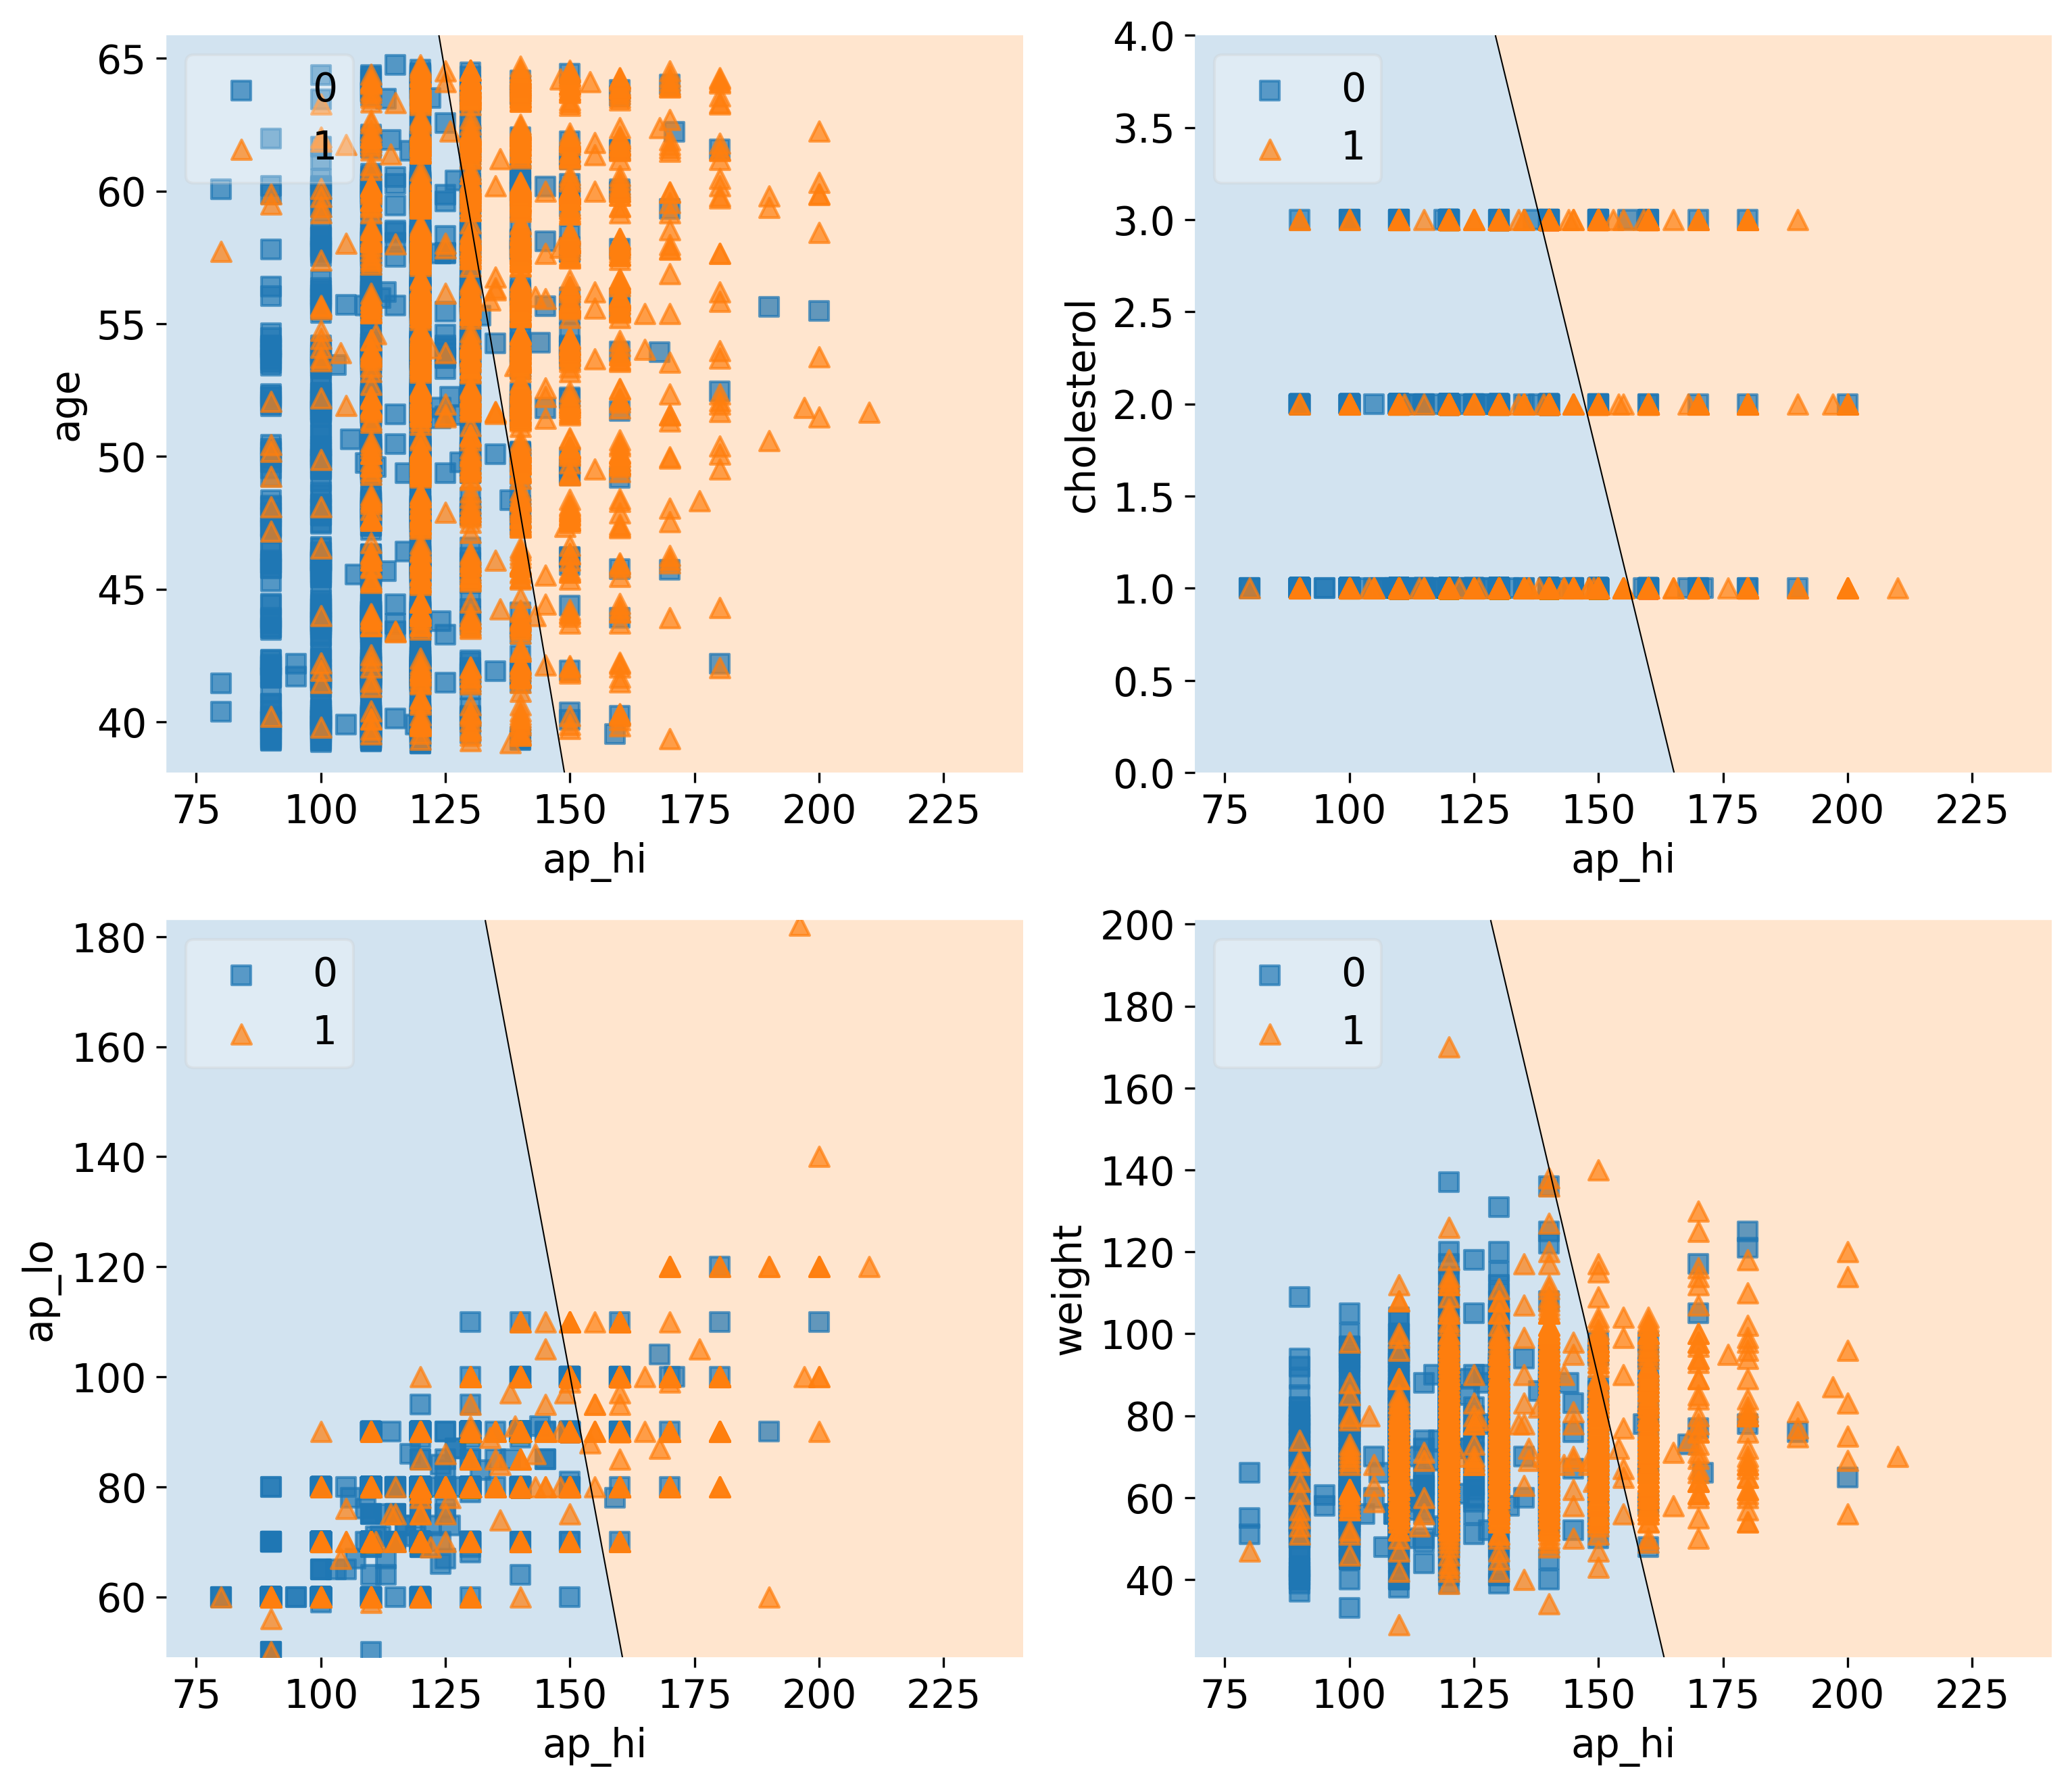

In [27]:
# Configure plot aesthetics
plt.rcParams.update({'font.size': 14, 'figure.dpi':300})

# Create a 2x2 grid of decision plots showing how pairs of features
# interact to predict cardiovascular disease risk
# Each subplot shows a 2D decision boundary with the test individual highlighted
fig, axarr = plt.subplots(2, 2, figsize=(12,8), sharex=True, sharey=False)

# Plot 1: Systolic BP vs Age
# Shows how risk increases with both age and blood pressure
mldatasets.create_decision_plot(X_test, y_test, log_result, ["ap_hi", "age"], None,
                                X_highlight, filler_feature_values, ax=axarr.flat[0])

# Plot 2: Systolic BP vs Cholesterol
# Shows combined effect of blood pressure and cholesterol
mldatasets.create_decision_plot(X_test, y_test, log_result, ["ap_hi", "cholesterol"], None,
                                X_highlight, filler_feature_values, ax=axarr.flat[1])

# Plot 3: Systolic BP vs Diastolic BP
# Shows how both blood pressure measurements contribute
mldatasets.create_decision_plot(X_test, y_test, log_result, ["ap_hi", "ap_lo"], None,
                                X_highlight, filler_feature_values, ax=axarr.flat[2])

# Plot 4: Systolic BP vs Weight
# Shows relationship between blood pressure and body weight
mldatasets.create_decision_plot(X_test, y_test, log_result, ["ap_hi", "weight"], None,
                                X_highlight, filler_feature_values, ax=axarr.flat[3])

plt.subplots_adjust(top=1, bottom=0, hspace=0.2, wspace=0.2)
plt.show()

In [28]:
# Not surprisingly, by themselves, ap_hi and a healthy cholesterol value are not enough to tip the scales 
# in favor of a definitive CVD diagnosis according to the model because it’s decidedly in the negative 
# decision region, and neither is a normal ap_lo (diastolic blood pressure). You can tell from these 
# three charts that although there’s some overlap in the distribution of squares and triangles, there is a 
# tendency for more triangles to gravitate toward the positive side as the y-axis increases, while fewer 
# squares populate this region

In [29]:
# The overlap across the decision boundary is expected because, after all, these squares and triangles 
# are based on the effects of all features. Still, you expect to find a somewhat consistent pattern. The 
# chart with ap_hi versus weight doesn’t have this pattern vertically as weight increases, which sug
# gests something is missing 

# Appreciate what Hinders Machine Learning Interpretability

In [30]:
# we were wondering why the chart with ap_hi versus weight didn’t have a conclusive 
# pattern. It could very well be that although weight is a risk factor, there are other critical mediating 
# variables that could explain the increased risk of CVD. A mediating variable is one that influences 
# the strength between the independent and target (dependent) variable. We probably don’t have to 
# think too hard to find what is missing. In Chapter 1, Interpretation, Interpretability, and Explainability; 
# and Why Does It All Matter?, we performed linear regression on weight and height because there’s a 
# linear relationship between these variables. In the context of human health, weight is not nearly as 
# meaningful without height, so you need to look at both.

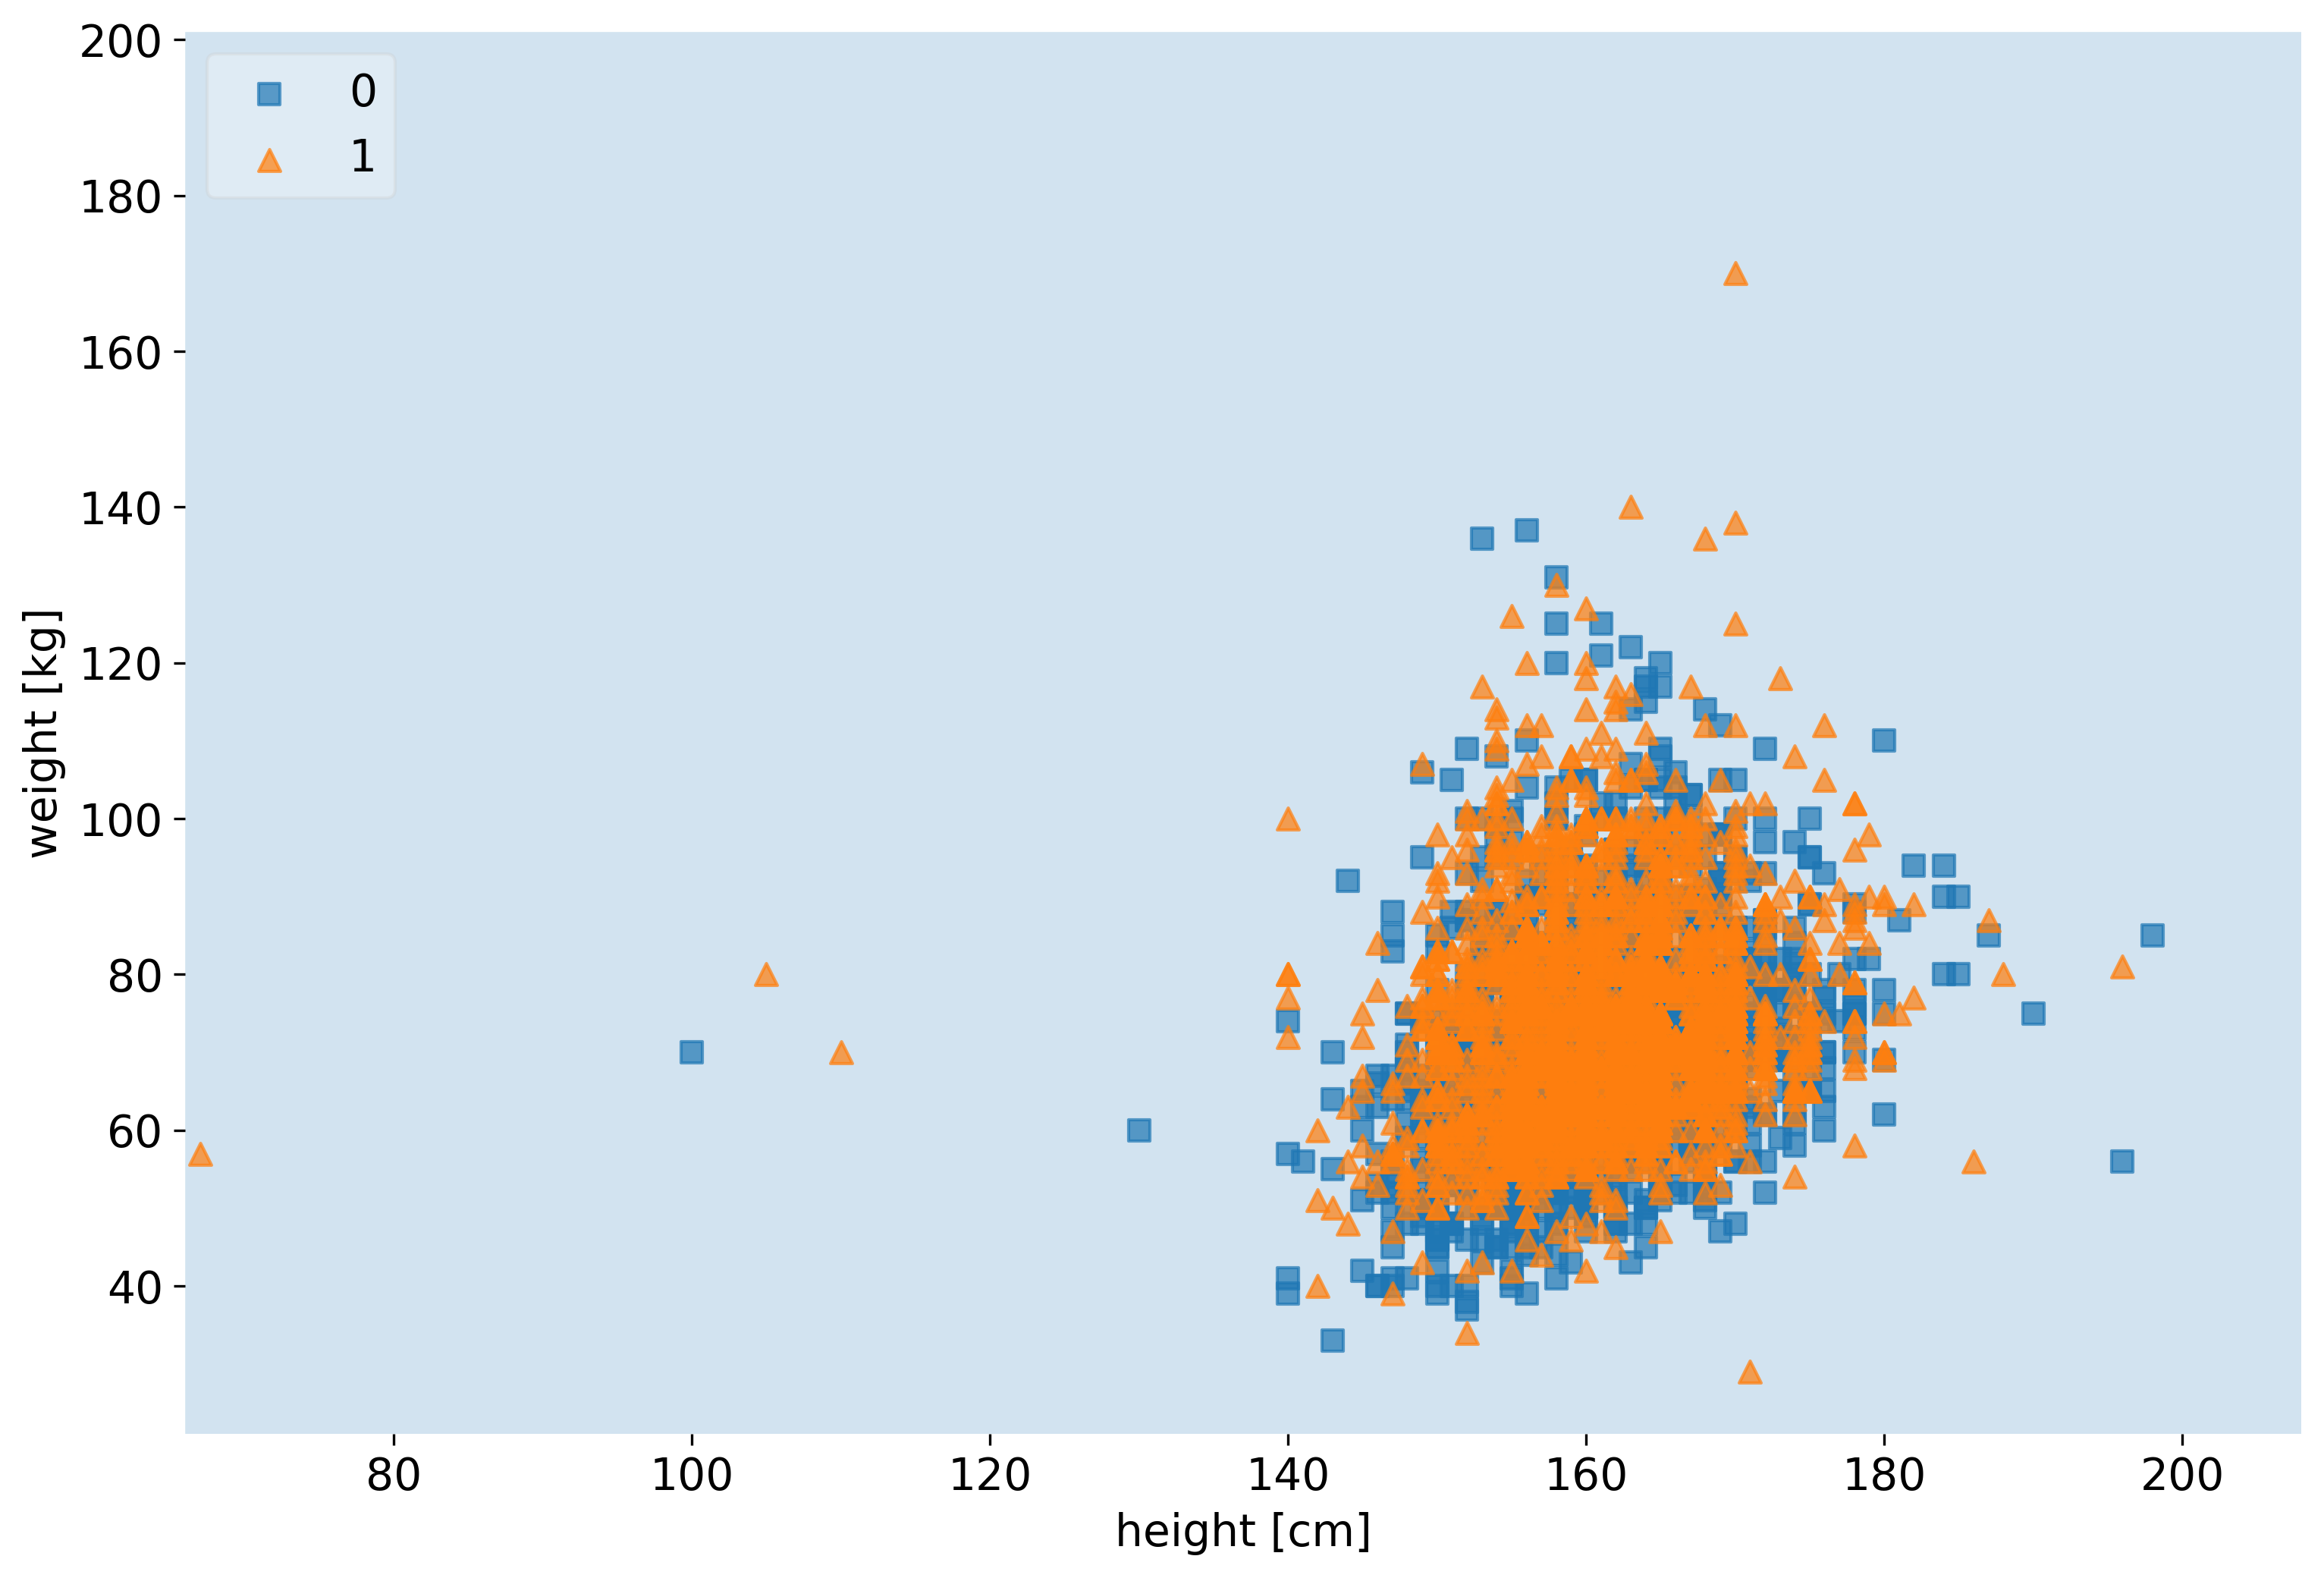

In [31]:
# Visualize decision boundary for height vs weight
# This demonstrates potential issues with correlated features
fig, ax = plt.subplots(1,1, figsize=(12,8))
mldatasets.create_decision_plot(X_test, y_test, log_result, [3,4], 
                                ['height [cm]', 'weight [kg]'],
                                X_highlight, filler_feature_values, ax=ax)
plt.show()

## Addressing Non-Linearity with feature engineering

In [32]:
# Create a new feature: Body Mass Index (BMI)
# BMI = weight(kg) / height(m)^2
# BMI captures non-linear relationship between height and weight
X2 = cvd_df.drop(['cardio'], axis=1).copy()
X2["bmi"] = X2["weight"] / (X2["height"]/100)**2

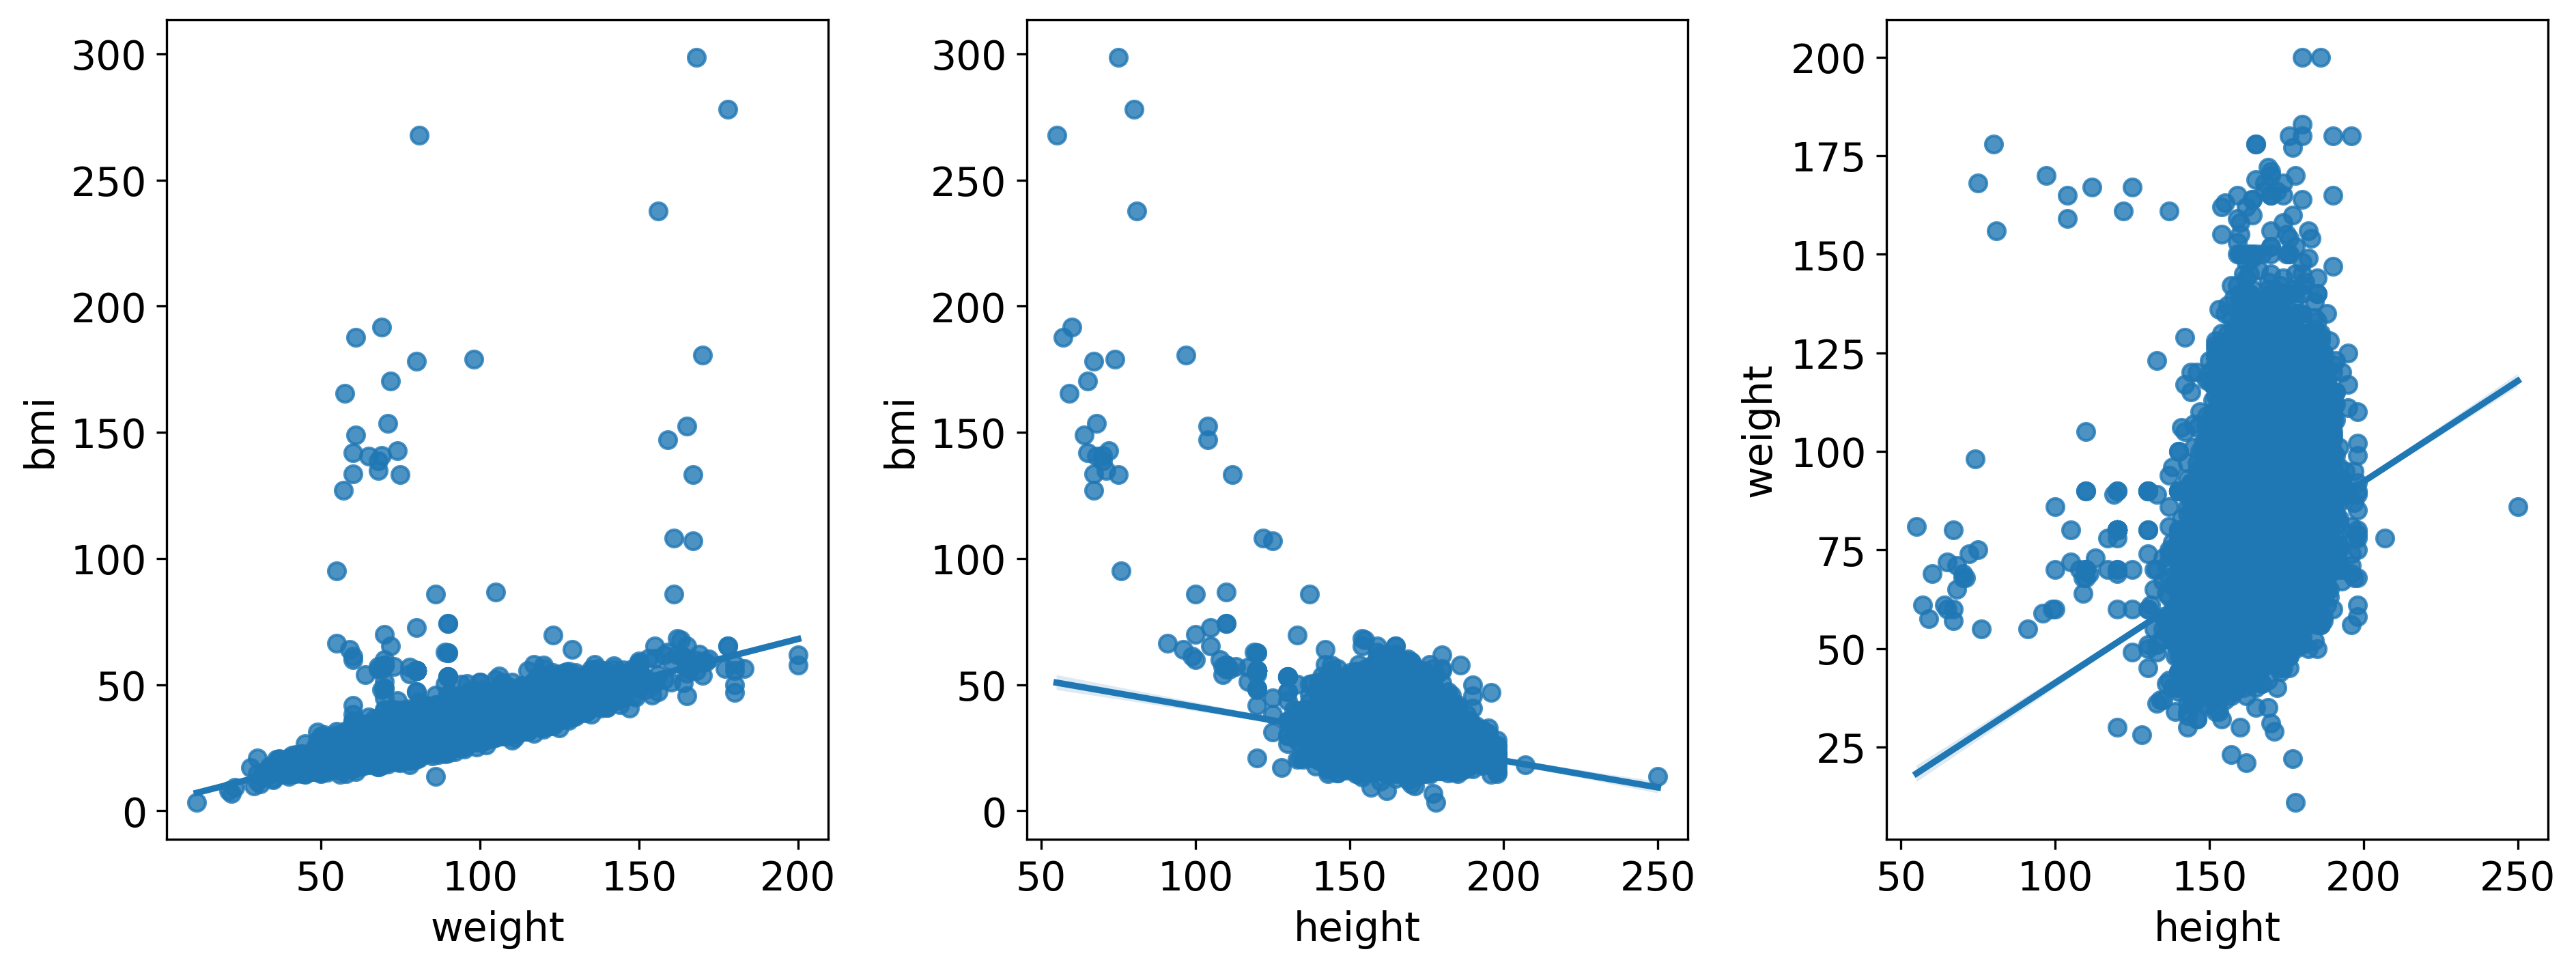

In [33]:
# Visualize relationships between weight, height, and BMI
# These plots show:
# 1. Positive correlation between weight and BMI
# 2. Negative correlation between height and BMI
# 3. Moderate positive correlation between height and weight
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,4))
sns.regplot(x="weight", y="bmi", data=X2, ax=ax1)
sns.regplot(x="height", y="bmi", data=X2, ax=ax2)
sns.regplot(x="height", y="weight", data=X2, ax=ax3)
plt.subplots_adjust(top=1, bottom=0, hspace=0.2, wspace=0.3)
plt.show()

In [34]:
# Remove weight and height since they're now represented by BMI
# This reduces multicollinearity and improves interpretability
X2 = X2.drop(['weight','height'], axis=1)

# Split the new dataset with BMI feature
X2_train, X2_test, _, _ = train_test_split(X2, y, test_size=0.15, random_state=9)

# Train a new logistic regression model with BMI instead of height/weight
log_model2 = sm.Logit(y_train, sm.add_constant(X2_train))
log_result2 = log_model2.fit()

Optimization terminated successfully.
         Current function value: 0.562766
         Iterations 6


In [35]:
# Reset seaborn settings to default
sns.reset_orig()

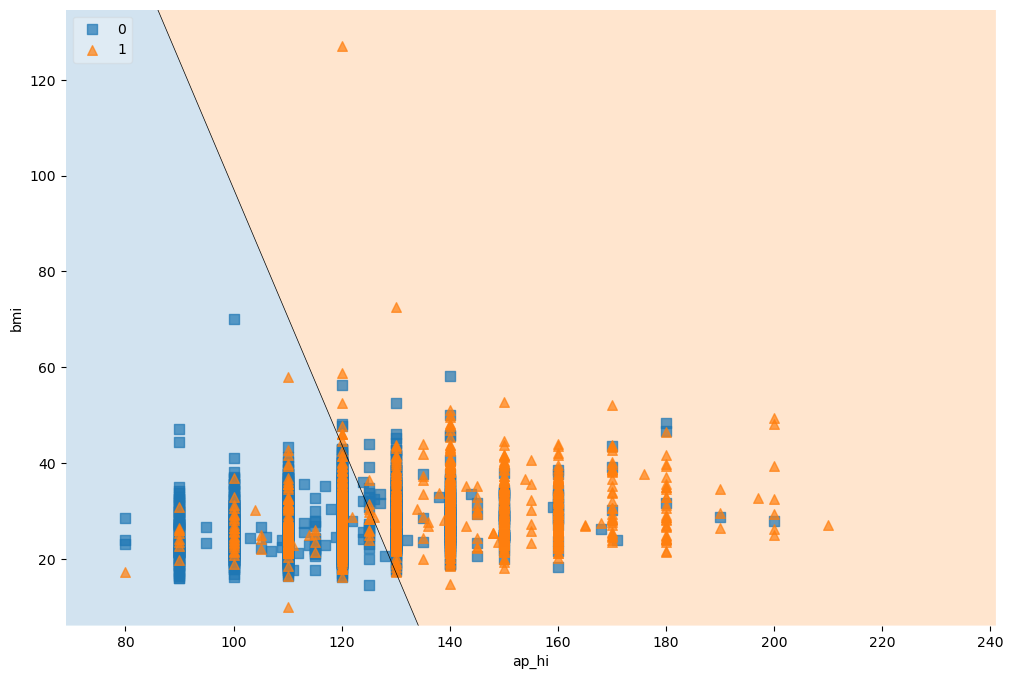

In [36]:
# Define new baseline values including BMI
filler_feature_values2 = {
    "age": 60, "gender": 1, "ap_hi": 110, "ap_lo": 70, 
    "cholesterol": 1, "gluc": 1, "smoke": 0, "alco": 0, 
    "active": 1, "bmi": 20
}

# Prepare highlighted data for the BMI model
X2_highlight = np.reshape(np.concatenate(([1],X2_test.iloc[2872].to_numpy())), (1,11))

# Visualize decision boundary for Systolic BP vs BMI
# This shows how the engineered feature (BMI) relates to disease risk
fig, ax = plt.subplots(1,1, figsize=(12,8))
mldatasets.create_decision_plot(X2_test, y_test, log_result2, ["ap_hi", "bmi"], None,
                                X2_highlight, filler_feature_values2, ax=ax)
plt.show()

## Interactivity

In [38]:
# When we created bmi, we didn’t only linearize a non-linear relationship, but we also created inter
# actions between two features. bmi is, therefore, an interaction feature, but this was informed by 
# domain knowledge. However, many model classes do this automatically by permutating all kinds of 
# operations between features. After all, features have latent relationships between one another, much 
# like height and width, and ap_hi and ap_lo. Therefore, automating the process of looking for them 
# is not always a bad thing. In fact, it can even be absolutely necessary. This is the case for many deep 
# learning problems where the data is unstructured and, therefore, part of the task of training the model 
# is looking for the latent relationships to make sense of it.

# However, for structured data, even though interactions can be significant for model performance, they 
# can hurt interpretability by adding potentially unnecessary complexity to the model and also finding 
# latent relationships that don’t mean anything (which is called a spurious relationship or correlation).

## Non-monotonicity

In [39]:
# Often, a variable has a meaningful and consistent relationship between a feature and the target vari
# able. So, we know that as age increases, the risk of CVD (cardio) must increase. There is no point at 
# which you reach a certain age and this risk drops. Maybe the risk slows down, but it does not drop. We 
# call this monotonicity, and functions that are monotonic are either always increasing or decreasing 
# throughout their entire domain.

# Please note that all linear relationships are monotonic, but not all monotonic relationships are nec
# essarily linear. This is because they don’t have to be a straight line. A common problem in machine 
# learning is that a model doesn’t know about a monotonic relationship that we expect because of our 
# domain expertise. Then, because of noise and omissions in the data, the model is trained in such a 
# way in which there are ups and downs where you don’t expect them.

# Let’s propose a hypothetical example. Let’s imagine that due to a lack of availability of data for 
# 57–60-year-olds, and because the few cases we did have for this range were negative for CVD, the model 
# could learn that this is where you would expect a drop in CVD risk. Some model classes are inherently 
# monotonic, such as logistic regression, so they can’t have this problem, but many others do.

In [40]:
# Summary

# MISSION 1: UNDERSTANDING CVD RISK FACTORS
# ------------------------------------------
# Top 4 risk factors identified (ranked by coefficient × std):
#   1. Systolic blood pressure (ap_hi) - MODIFIABLE
#   2. Age - NON-MODIFIABLE
#   3. Cholesterol - MODIFIABLE  
#   4. Weight - MODIFIABLE
#
# Key insight: Features don't work in isolation!
# - ap_hi needs ap_lo for proper interpretation (can't evaluate systolic without diastolic)
# - Weight needs height for proper interpretation (led to BMI feature engineering)

# DATA QUALITY & BIAS CONSIDERATIONS
# -----------------------------------
# 1. DATA ANOMALIES: Found ~1.77% of records with impossible blood pressure values
#    - Removed records where BP > 370 or BP <= 40
#    - Removed records where systolic < diastolic (physiologically impossible)
#    Lesson: Unchecked anomalies can bias the model
#
# 2. SAMPLE BIAS: Top features were all objective/examination-based
#    - Why aren't smoking/alcohol more significant?
#    - Possible issues:
#      * Dataset may underrepresent smokers/drinkers
#      * Question asked "smoke now" not "ever smoked for extended period"
#    - Would need to compare with more trustworthy datasets to verify
#
# 3. EXCLUSION BIAS: Missing important medical information
#    - Medical research shows isolated systolic hypertension is caused by:
#      * Diabetes (NOT in dataset)
#      * Hyperthyroidism (NOT in dataset)
#      * Arterial stiffness (NOT in dataset)
#      * Obesity (CAN be derived via BMI)
#    - Missing relevant features creates unexplainable gaps in predictions
#    - Chapter 10 will cover feature selection/engineering to address this

# MISSION 2: INTERPRETING INDIVIDUAL PREDICTIONS
# -----------------------------------------------
# Method used: Decision boundary plots
# - Visualizes 2D slices of high-dimensional decision space
# - Shows how feature pairs interact to predict CVD risk
# - Highlighted specific patient (index 2872): 37.9% CVD risk
#
# Limitations of this method:
# - Only shows 2 features at a time (out of 11 total)
# - Other features held constant at baseline values
# - Overlap across boundaries expected (other features influence actual diagnosis)
# - Becomes impractical with many interacting features

# KEY CONCEPTS COVERED
# --------------------
# 1. INTERPRETATION METHOD TYPES:
#    - Global: Feature importance (odds ratios, coefficient × std)
#    - Local: Decision boundaries for individual predictions
#
# 2. THREE ELEMENTS IMPACTING INTERPRETABILITY:
#    - Feature interactions (ap_hi + ap_lo, weight + height)
#    - Relationship types (linear vs non-linear, monotonic vs non-monotonic)
#    - Data quality (anomalies, sample bias, exclusion bias)
#
# 3. FEATURE IMPORTANCE ANALYSIS METHODS:
#    - Odds ratios: exp(coefficient) - direct effect interpretation
#    - Standard deviation: typical variation in each feature
#    - Coefficient × Std: practical impact accounting for both effect and variation
#
# 4. NON-LINEARITY & FEATURE ENGINEERING:
#    - Weight and height have non-linear relationship with CVD risk
#    - Solution: Created BMI = weight/height² to capture this properly
#    - Reduced multicollinearity and improved interpretability

# PRACTICAL TAKEAWAYS
# -------------------
# - Models are only as good as the data they're trained on
# - Always check for data anomalies and understand collection methodology
# - Consider what's missing (exclusion bias) not just what's present
# - Feature interactions matter more than individual features
# - Multiple perspectives (odds ratios, decision plots, etc.) provide fuller picture
# - Simple interpretation methods have value but also clear limitations